In [10]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Specify the .mat file paths
file_path1 = '/content/drive/MyDrive/Train_data.mat'
file_path2 = '/content/drive/MyDrive/Test_Data.mat'

# Step 3: Load the .mat files using scipy
from scipy.io import loadmat
train_data = loadmat(file_path1)
test_data = loadmat(file_path2)

# Step 4: Access the variables inside the .mat files
print(train_data.keys())  # This will show the variables stored in the 'train' .mat file
print(test_data.keys())   # This will show the variables stored in the 'test' .mat file

# Step 5: Extract the data stored under the correct keys
# Assuming that the keys 'train' and 'test' exist in the respective files:
train = train_data['train']
test = test_data['test']

# Display a part of the extracted data to verify
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)


Mounted at /content/drive
dict_keys(['__header__', '__version__', '__globals__', 'train'])
dict_keys(['__header__', '__version__', '__globals__', 'test'])
Train data shape: (1600, 1594)
Test data shape: (400, 1594)


Mounted at /content/drive
dict_keys(['__header__', '__version__', '__globals__', 'train'])
dict_keys(['__header__', '__version__', '__globals__', 'test'])
Train data shape: (1600, 1594)
Test data shape: (400, 1594)
Best λ value: 100
Best cross-validated accuracy: 0.8099999999999999
Training accuracy: 0.950625
Test accuracy: 0.8025


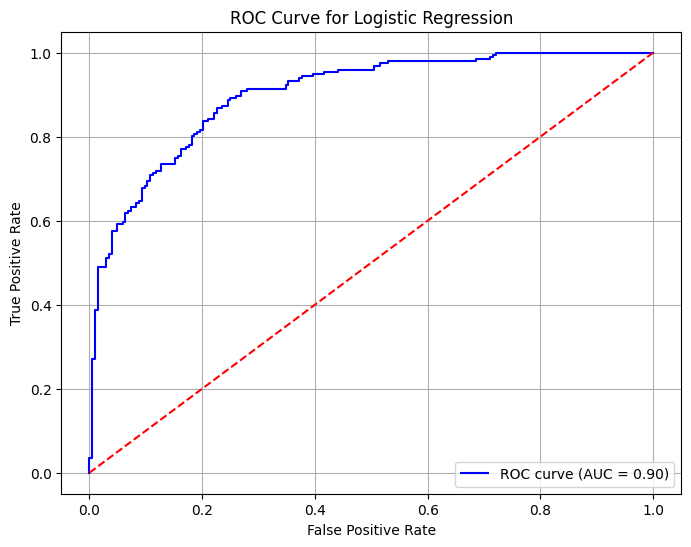

In [11]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy.io import loadmat
from google.colab import drive

# Step 2: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 3: Specify the .mat file paths
file_path1 = '/content/drive/MyDrive/Train_data.mat'
file_path2 = '/content/drive/MyDrive/Test_Data.mat'

# Step 4: Load the .mat files using scipy
train_data = loadmat(file_path1)
test_data = loadmat(file_path2)

# Step 5: Access the variables inside the .mat files
print(train_data.keys())  # This will show the variables stored in the 'train' .mat file
print(test_data.keys())   # This will show the variables stored in the 'test' .mat file

# Step 6: Extract the data stored under the correct keys
# Assuming that the keys 'train' and 'test' exist in the respective files:
train = train_data['train']
test = test_data['test']

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

# Step 7: Prepare features (X) and labels (y)
# Assuming that the last column is the label
X_train = train[:, :-1]  # Features for training data
y_train = train[:, -1]   # Labels for training data

X_test = test[:, :-1]    # Features for test data
y_test = test[:, -1]     # Labels for test data

# Step 8: Define the range of λ values for regularization
lambda_values = [10**i for i in range(-5, 3)]  # λ ∈ {10^-5, 10^-4, ..., 10^2}

# Step 9: Perform 10-fold cross-validation to find the best λ value
kf = KFold(n_splits=10, shuffle=True, random_state=42)

best_lambda = None
best_score = -np.inf

for lam in lambda_values:
    model = LogisticRegression(C=1/lam, penalty='l2', solver='liblinear', random_state=42)
    # Perform cross-validation and calculate the mean accuracy
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_lambda = lam

print(f"Best λ value: {best_lambda}")
print(f"Best cross-validated accuracy: {best_score}")

# Step 10: Train the Logistic Regression model with the best λ value
final_model = LogisticRegression(C=1/best_lambda, penalty='l2', solver='liblinear', random_state=42)
final_model.fit(X_train, y_train)

# Step 11: Evaluate the model on the training set
y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy}")

# Step 12: Evaluate the model on the test set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy}")

# Step 13: Generate the ROC curve and calculate AUC for the test set
y_test_proba = final_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Step 14: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()
